In [7]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline


In [8]:
#normality check
from scipy.stats import shapiro

#preprocessing data
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder

#building and optimizing models
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#clustering
from sklearn.cluster import KMeans

In [9]:
columns = [
    'user_id', 'name', 'age', 'gender', 'height', 'weight', 'contact_details',
    'nationality', 'email', 'location_group', 'school', 'password', 'parent_id',
    'role', 'created_date', 'last_login', 'total_point', 'health_tier',
    'workout_frequency', 'preferred_intensity', 'goal_date'
]
df = pd.read_csv('../db/user.csv', header = None, names = columns)
df.head(5)

,user_id,name,age,gender,height,weight,contact_details,nationality,email,location_group,...,password,parent_id,role,created_date,last_login,total_point,health_tier,workout_frequency,preferred_intensity,goal_date
0,1,Junyang,21,Male,152.03,62.16,Contact_1,Singaporean,junyang.ng.2021@scis.smu.edu.sg,East,...,pass1,NaN,User,26-06-22,2023-10-06 00:00:00,215,3,NaN,NaN,NaN
1,2,User_2,31,Female,198.12,91.65,Contact_2,Singaporean,user2@example.com,East,...,pass2,NaN,Admin,09-03-24,2023-11-13 00:00:00,168,2,NaN,NaN,NaN
2,3,User_3,52,Female,177.54,95.07,Contact_3,Singaporean,user3@example.com,North,...,pass3,1.0,User,26-01-23,2024-12-15 00:00:00,304,3,NaN,NaN,NaN
3,4,User_4,43,Male,189.49,75.46,Contact_4,Singaporean,user4@example.com,East,...,pass4,NaN,User,30-10-23,2022-11-29 00:00:00,76,2,NaN,NaN,NaN
4,5,User_5,57,Female,183.15,51.11,Contact_5,Singaporean,user5@example.com,East,...,pass5,NaN,User,02-12-22,2023-03-27 00:00:00,319,3,NaN,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              50 non-null     int64  
 1   name                 50 non-null     object 
 2   age                  50 non-null     int64  
 3   gender               50 non-null     object 
 4   height               50 non-null     float64
 5   weight               50 non-null     float64
 6   contact_details      50 non-null     object 
 7   nationality          50 non-null     object 
 8   email                50 non-null     object 
 9   location_group       50 non-null     object 
 10  school               50 non-null     object 
 11  password             50 non-null     object 
 12  parent_id            1 non-null      float64
 13  role                 50 non-null     object 
 14  created_date         50 non-null     object 
 15  last_login           50 non-null     objec

In [11]:
df.describe()

,user_id,age,height,weight,parent_id,total_point,health_tier,workout_frequency,preferred_intensity,goal_date
count,50.00000,50.000000,50.000000,50.00000,1.0,50.000000,50.000000,0.0,0.0,0.0
mean,25.50000,39.380000,176.110800,72.47100,1.0,302.580000,2.080000,NaN,NaN,NaN
std,14.57738,12.801291,15.561111,14.94667,NaN,132.642082,0.853325,NaN,NaN,NaN
min,1.00000,18.000000,150.550000,51.11000,1.0,14.000000,1.000000,NaN,NaN,NaN
25%,13.25000,27.250000,161.875000,59.32250,1.0,209.000000,1.000000,NaN,NaN,NaN
50%,25.50000,42.000000,176.275000,72.38000,1.0,309.500000,2.000000,NaN,NaN,NaN
75%,37.75000,48.750000,189.917500,86.90750,1.0,420.250000,3.000000,NaN,NaN,NaN
max,50.00000,60.000000,199.570000,97.72000,1.0,488.000000,3.000000,NaN,NaN,NaN


In [12]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 user_id                 0
name                    0
age                     0
gender                  0
height                  0
weight                  0
contact_details         0
nationality             0
email                   0
location_group          0
school                  0
password                0
parent_id              49
role                    0
created_date            0
last_login              0
total_point             0
health_tier             0
workout_frequency      50
preferred_intensity    50
goal_date              50
dtype: int64


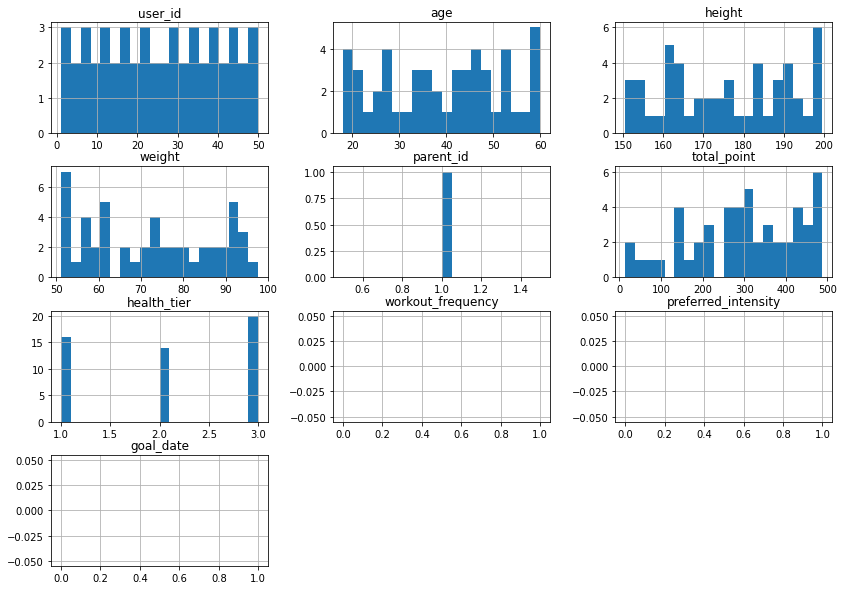

In [13]:
df.hist(bins=20, figsize = (14,10))
plt.show()

In [14]:
# feature_columns = ['age', 'height', 'weight', 'workout_frequency', 'preferred_intensity']
# feature_columns = ['height', 'weight', 'workout_frequency', 'preferred_intensity']
# feature_columns = ['age','workout_frequency', 'preferred_intensity']
feature_columns = ['workout_frequency', 'preferred_intensity']


In [15]:
# scaler = StandardScaler()

# df[feature_columns] = scaler.fit_transform(df[feature_columns])
# print(df[feature_columns].head())

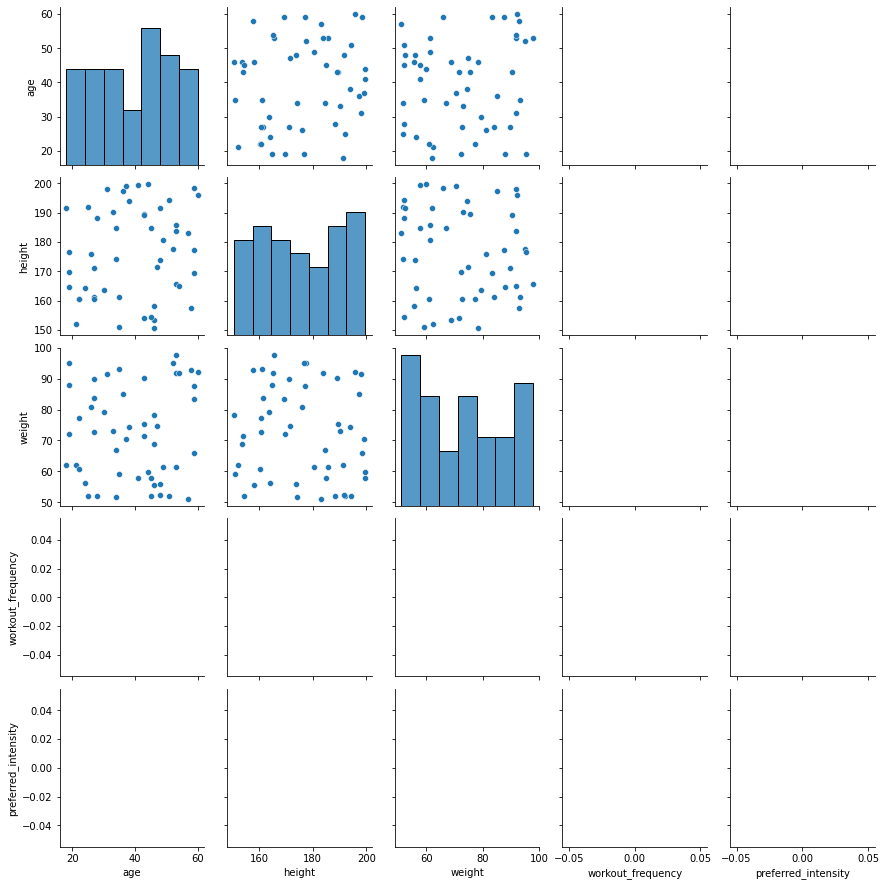

In [16]:
sns.pairplot(df[['age', 'height', 'weight', 'workout_frequency', 'preferred_intensity']])
plt.show()

In [17]:
kmeans = KMeans(n_clusters = 3, random_state=42)
data = df[feature_columns]
df['cluster'] = kmeans.fit_predict(data)
df.head(5)


ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
df['predicted_tier'] = df['cluster']

In [ ]:
print(df[['user_id', 'predicted_tier', 'health_tier']])

    user_id  predicted_tier  health_tier
0         1               0            3
1         2               0            2
2         3               0            3
3         4               0            2
4         5               2            3
5         6               2            1
6         7               0            1
7         8               1            3
8         9               1            1
9        10               1            1
10       11               2            2
11       12               1            3
12       13               2            3
13       14               2            2
14       15               1            1
15       16               1            1
16       17               0            2
17       18               1            2
18       19               0            2
19       20               1            1
20       21               1            1
21       22               0            3
22       23               1            2
23       24     

In [ ]:
def update_tier(tier):
    if tier == 0:
        return 1
    elif tier == 1:
        return 3
    else:
        return tier

In [ ]:
df['predicted_tier'] = df['predicted_tier'].apply(update_tier)

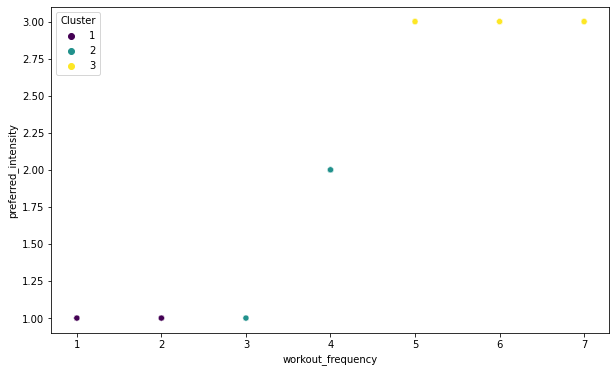

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting 2D scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['workout_frequency'], y=df['preferred_intensity'], hue=df['predicted_tier'], palette='viridis')
plt.xlabel('workout_frequency')
plt.ylabel('preferred_intensity')
plt.legend(title='Cluster')
plt.show()
